# Incorporating current data into charts

In [2]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5, fix_cartopy_vectors

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

#import shapely
import shapely
from shapely import Polygon, geometry
from shapely.geometry import Point

Text(0.5, 1.0, 'current along ESE direction')

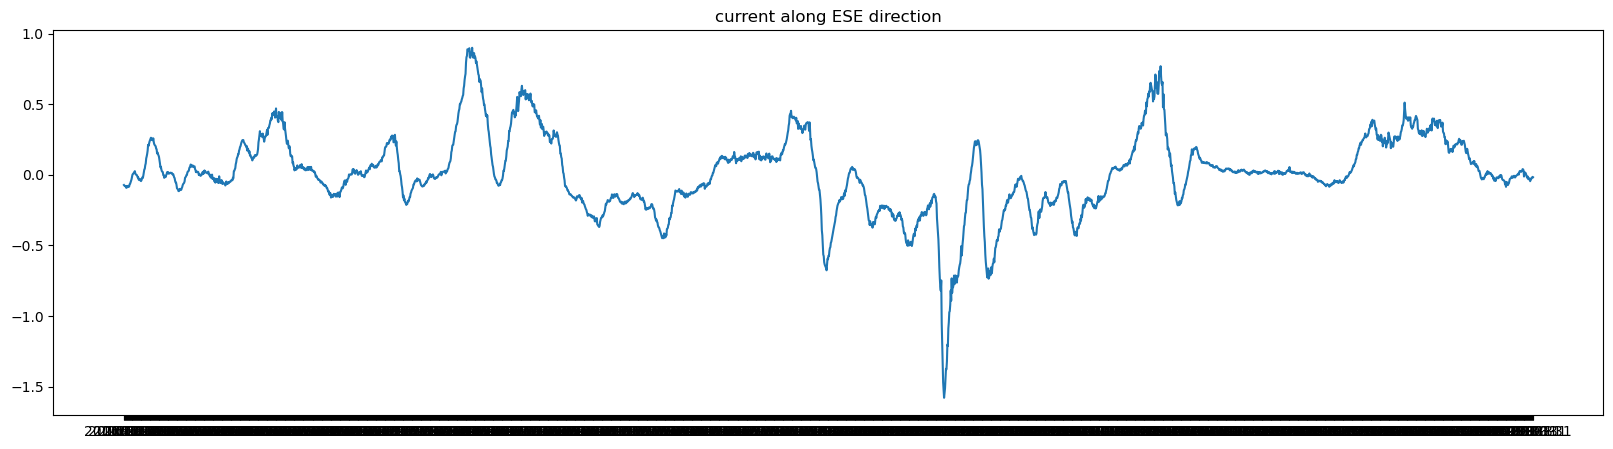

In [14]:
# pick a date
date_list = pd.date_range(datetime(2016, 12, 1, 0), datetime(2017, 1, 31, 23), freq="30min")

#importing the dataset

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

u = ds.u.sel(time=slice(date_list[0] , date_list[-1])).mean(dim='depth')
v = ds.v.sel(time = slice(date_list[0], date_list[-1])).mean(dim = 'depth')

u_along = np.cos(157.5 * np.pi/180)
v_along = np.sin(157.5 * np.pi/180)
vector_proj = (u_along * u.values) + (v_along * v.values)

fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(date_list, vector_proj)
ax.set_xticks(date_list)
n = 10  # Keeps every 4th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

plt.title(f'current along ESE direction', fontsize=12)

# d = {'time': date_list, 'u': u, 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
# df = pd.DataFrame(data=d)
# df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}currents_bidaily.csv', index=None) #removes Index column


In [11]:
path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds2 = xr.open_mfdataset([path1, path2])
ds2.close

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

df = pd.read_csv("/Users/reu/Box/Data/2017angles_hourly.csv")
df.projlist.values

array([ 1.56047597,  1.23160009,  1.04049288, ..., -0.04277445,
       -0.6035997 , -1.62253227])

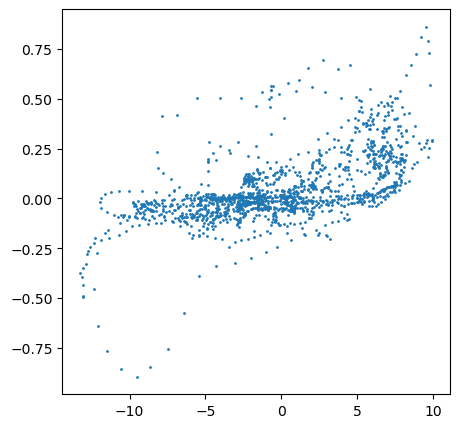

In [12]:
u = ds.u.sel(time=slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim='depth')
v = ds.v.sel(time = slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim = 'depth')

u_along = np.cos(157.5 * np.pi/180)
v_along = np.sin(157.5 * np.pi/180)
vector_proj = (u_along * u.values) + (v_along * v.values)

hourly_temps = ds2.T.sel(time=slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim='depth').values[::2]

hourly_proj = vector_proj[::2]


fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(df.projlist.values, hourly_proj * (hourly_temps + 1.8), s=1) #think of this as heat flux, current, etc. wind correlates to temperature in the current.
# plt.scatter(df.projlist.values, hourly_temps, s=1) # you don't really see much correlation
# plt.scatter(df.projlist.values, hourly_proj, s=1) # you see a correlation between the wind and the current!

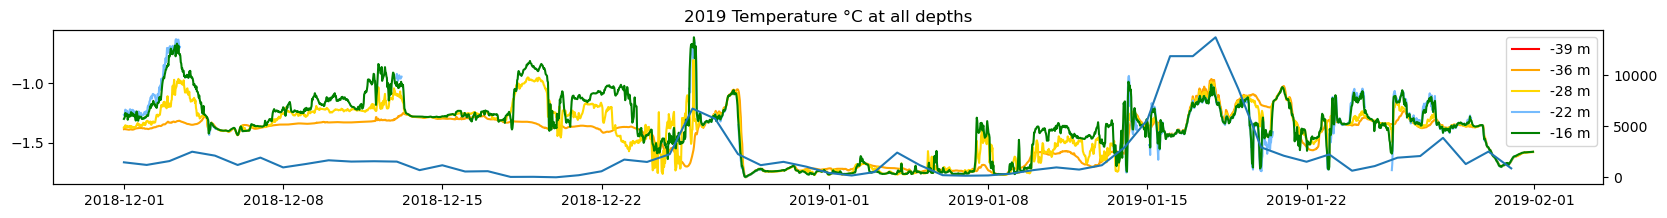

In [13]:
df_daily_size = pd.read_csv("/Users/reu/Box/Data/2019SIC.csv")
time_daily = pd.to_datetime(df_daily_size.time)

path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

temps = ds.T.sel(time = slice(datetime(2018,12,1), datetime(2019,1,31,23)))



colors = ['red', 'orange', 'gold', 'xkcd:sky blue', 'green'] # 5 colors
fig, ax = plt.subplots(figsize = (20, 2))

for cc, depth in enumerate(temps.depth):
    plt.plot(temps.time, temps.sel(depth=depth).T, c = colors[cc], label=f'{depth.values:.0f} m')
    
plt.legend(bbox_to_anchor=(1,1))
plt.title(f"2019 Temperature °C at all depths")

axtwin = ax.twinx()
axtwin.plot(time_daily, df_daily_size.Open_water_area_km2)

In [113]:
temps

<xarray.DataArray 'T' (depth: 5, time: 2975)>
dask.array<getitem, shape=(5, 2975), dtype=float64, chunksize=(5, 2975), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float64 -39.0 -36.0 -28.0 -22.0 -16.0
  * time     (time) datetime64[ns] 2016-12-01 ... 2017-01-31T23:00:00